## Deep Learning Model with CNN for object classification
### Pattadon Naksuwan

First we install the libraries

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

Viewing the test image

In [2]:
img = cv2.imread('apple_test1.png')
img.shape

(480, 640, 3)

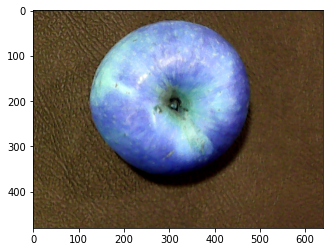

In [3]:
plt.imshow(img)

In [4]:
img

array([[[ 77,  55,  39],
        [ 79,  58,  42],
        [ 59,  43,  31],
        ...,
        [ 77,  54,  31],
        [ 77,  56,  26],
        [ 77,  56,  26]],

       [[ 78,  56,  42],
        [ 74,  53,  39],
        [ 71,  56,  49],
        ...,
        [ 78,  51,  31],
        [ 74,  53,  26],
        [ 75,  54,  27]],

       [[ 70,  56,  39],
        [ 66,  51,  35],
        [ 74,  61,  37],
        ...,
        [ 72,  54,  24],
        [ 72,  54,  22],
        [ 73,  56,  23]],

       ...,

       [[103,  78,  48],
        [105,  80,  51],
        [102,  85,  39],
        ...,
        [ 84,  56,  40],
        [ 78,  48,  32],
        [ 76,  45,  30]],

       [[ 55,  51,  19],
        [ 84,  80,  48],
        [109,  98,  54],
        ...,
        [ 74,  50,  36],
        [ 79,  49,  33],
        [ 77,  46,  31]],

       [[ 77,  62,  16],
        [ 92,  77,  31],
        [101,  91,  44],
        ...,
        [ 71,  49,  35],
        [ 69,  41,  25],
        [ 75,  47,  31]]

In [5]:
img.shape

(480, 640, 3)

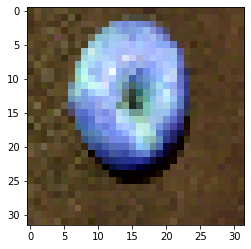

In [6]:
plt.imshow(cv2.resize(img, (32, 32)))

Creating a dictionary to store the image data for each class

In [7]:
fruit_dict = {}
for fruit_name in ['apple','capsicum','lemon','orange','potato']:
    fruit_dict[fruit_name] = []
    
fruit_dict

{'apple': [], 'capsicum': [], 'lemon': [], 'orange': [], 'potato': []}

In [8]:
import os
for fruit_name in ['apple','capsicum','lemon','orange','potato']:
    for entry in os.scandir("./dataset/" + fruit_name):
        file_name = str(entry.path)
        img = cv2.imread(file_name)
        scaled_img = cv2.resize(img, (32, 32))
        fruit_dict[fruit_name].append(scaled_img)
fruit_dict

{'apple': [array([[[ 97,  91,  58],
          [118, 100,  64],
          [109,  96,  67],
          ...,
          [ 96,  84,  54],
          [118, 106,  67],
          [118,  98,  69]],
  
         [[124, 117,  82],
          [128, 113,  87],
          [ 97,  82,  60],
          ...,
          [115, 101,  71],
          [118, 111,  85],
          [115, 104,  75]],
  
         [[111, 102,  73],
          [119, 108,  73],
          [111, 106,  67],
          ...,
          [ 98,  86,  68],
          [105,  94,  73],
          [126, 117,  89]],
  
         ...,
  
         [[ 82,  80,  49],
          [ 86,  80,  46],
          [ 71,  62,  41],
          ...,
          [ 80,  67,  39],
          [ 95,  78,  53],
          [ 90,  72,  51]],
  
         [[105, 101,  70],
          [ 82,  72,  50],
          [ 82,  82,  38],
          ...,
          [ 93,  81,  52],
          [ 93,  80,  59],
          [ 99,  80,  60]],
  
         [[ 98,  88,  61],
          [ 82,  73,  37],
          [ 62,

In [9]:
fruit_dict['apple'][0].shape

(32, 32, 3)

In [10]:
for fruit_name in ['apple','capsicum','lemon','orange','potato']:
    print("There are "+str(len(fruit_dict[fruit_name]))+" "+fruit_name+" images.")

There are 56 apple images.
There are 51 capsicum images.
There are 56 lemon images.
There are 54 orange images.
There are 55 potato images.


In [11]:
result = []
for images in fruit_dict['apple']:
    result.append(images)

result

[array([[[ 97,  91,  58],
         [118, 100,  64],
         [109,  96,  67],
         ...,
         [ 96,  84,  54],
         [118, 106,  67],
         [118,  98,  69]],
 
        [[124, 117,  82],
         [128, 113,  87],
         [ 97,  82,  60],
         ...,
         [115, 101,  71],
         [118, 111,  85],
         [115, 104,  75]],
 
        [[111, 102,  73],
         [119, 108,  73],
         [111, 106,  67],
         ...,
         [ 98,  86,  68],
         [105,  94,  73],
         [126, 117,  89]],
 
        ...,
 
        [[ 82,  80,  49],
         [ 86,  80,  46],
         [ 71,  62,  41],
         ...,
         [ 80,  67,  39],
         [ 95,  78,  53],
         [ 90,  72,  51]],
 
        [[105, 101,  70],
         [ 82,  72,  50],
         [ 82,  82,  38],
         ...,
         [ 93,  81,  52],
         [ 93,  80,  59],
         [ 99,  80,  60]],
 
        [[ 98,  88,  61],
         [ 82,  73,  37],
         [ 62,  57,  35],
         ...,
         [ 80,  70,  43],
  

In [12]:
test = np.asarray(result)
test.shape

(56, 32, 32, 3)

In [13]:
X = []
for fruit_name in ['apple','capsicum','lemon','orange','potato']:
    for images in fruit_dict[fruit_name]:
        X.append(images)

X = np.asarray(X)
X.shape

(272, 32, 32, 3)

In [14]:
Y = []
for x in range(56):
    Y.append(0)
for x in range(51):
    Y.append(1)
for x in range(56):
    Y.append(2)
for x in range(54):
    Y.append(3)
for x in range(55):
    Y.append(4)

Y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [15]:
len(Y)

272

In [16]:
Y = np.asarray(Y)
Y = np.reshape(Y,(272,1))
Y.shape

(272, 1)

In [17]:
X

array([[[[ 97,  91,  58],
         [118, 100,  64],
         [109,  96,  67],
         ...,
         [ 96,  84,  54],
         [118, 106,  67],
         [118,  98,  69]],

        [[124, 117,  82],
         [128, 113,  87],
         [ 97,  82,  60],
         ...,
         [115, 101,  71],
         [118, 111,  85],
         [115, 104,  75]],

        [[111, 102,  73],
         [119, 108,  73],
         [111, 106,  67],
         ...,
         [ 98,  86,  68],
         [105,  94,  73],
         [126, 117,  89]],

        ...,

        [[ 82,  80,  49],
         [ 86,  80,  46],
         [ 71,  62,  41],
         ...,
         [ 80,  67,  39],
         [ 95,  78,  53],
         [ 90,  72,  51]],

        [[105, 101,  70],
         [ 82,  72,  50],
         [ 82,  82,  38],
         ...,
         [ 93,  81,  52],
         [ 93,  80,  59],
         [ 99,  80,  60]],

        [[ 98,  88,  61],
         [ 82,  73,  37],
         [ 62,  57,  35],
         ...,
         [ 80,  70,  43],
        

In [18]:
Y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

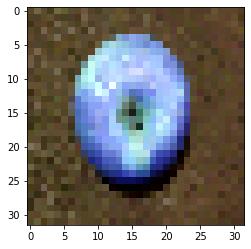

In [19]:
plt.imshow(X[12])

In [20]:
Y[12]

array([0])

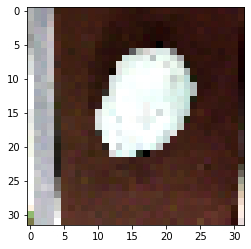

In [21]:
plt.imshow(X[219])

In [22]:
Y[219]

array([4])

In [23]:
class_dict = {}
count = 0
for fruit_name in fruit_dict.keys():
    class_dict[fruit_name] = count
    count = count + 1
class_dict

{'apple': 0, 'capsicum': 1, 'lemon': 2, 'orange': 3, 'potato': 4}

In [24]:
Y = Y.reshape(-1,)

In [25]:
Y.shape

(272,)

In [26]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [27]:
#x_train = x_train/255.0
#x_test = x_test/255.0

In [28]:
X=X/255.0

In [29]:
X

array([[[[0.38039216, 0.35686275, 0.22745098],
         [0.4627451 , 0.39215686, 0.25098039],
         [0.42745098, 0.37647059, 0.2627451 ],
         ...,
         [0.37647059, 0.32941176, 0.21176471],
         [0.4627451 , 0.41568627, 0.2627451 ],
         [0.4627451 , 0.38431373, 0.27058824]],

        [[0.48627451, 0.45882353, 0.32156863],
         [0.50196078, 0.44313725, 0.34117647],
         [0.38039216, 0.32156863, 0.23529412],
         ...,
         [0.45098039, 0.39607843, 0.27843137],
         [0.4627451 , 0.43529412, 0.33333333],
         [0.45098039, 0.40784314, 0.29411765]],

        [[0.43529412, 0.4       , 0.28627451],
         [0.46666667, 0.42352941, 0.28627451],
         [0.43529412, 0.41568627, 0.2627451 ],
         ...,
         [0.38431373, 0.3372549 , 0.26666667],
         [0.41176471, 0.36862745, 0.28627451],
         [0.49411765, 0.45882353, 0.34901961]],

        ...,

        [[0.32156863, 0.31372549, 0.19215686],
         [0.3372549 , 0.31372549, 0.18039216]

In [30]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

2022-03-14 14:21:01.747163: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-14 14:21:01.748676: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [31]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
cnn.fit(X, Y, epochs=25)

Train on 272 samples
Epoch 1/25
272/272 [==============================] - 1s 5ms/sample - loss: 1.4589 - accuracy: 0.3750
Epoch 2/25
272/272 [==============================] - 0s 870us/sample - loss: 1.0043 - accuracy: 0.6140
Epoch 3/25
272/272 [==============================] - 0s 782us/sample - loss: 0.6361 - accuracy: 0.7610
Epoch 4/25
272/272 [==============================] - 0s 765us/sample - loss: 0.4590 - accuracy: 0.8199
Epoch 5/25
272/272 [==============================] - 0s 745us/sample - loss: 0.3337 - accuracy: 0.8971
Epoch 6/25
272/272 [==============================] - 0s 771us/sample - loss: 0.2916 - accuracy: 0.9044
Epoch 7/25
272/272 [==============================] - 0s 768us/sample - loss: 0.1702 - accuracy: 0.9449
Epoch 8/25
272/272 [==============================] - 0s 769us/sample - loss: 0.1328 - accuracy: 0.9632
Epoch 9/25
272/272 [==============================] - 0s 769us/sample - loss: 0.0785 - accuracy: 0.9926
Epoch 10/25
272/272 [========================

In [33]:
cnn.evaluate(X,Y)

272/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.002873037928057944, 1.0]

In [34]:
y_pred = cnn.predict(X)
y_pred[:5]

array([[9.99656916e-01, 3.09370313e-04, 4.55023397e-08, 3.16873738e-05,
        2.05471974e-06],
       [9.99946475e-01, 4.98747104e-05, 2.71451817e-09, 2.02065598e-06,
        1.71714885e-06],
       [9.97706056e-01, 2.75413040e-05, 4.85864007e-08, 2.26617721e-03,
        1.92341517e-07],
       [9.97839570e-01, 4.94846572e-05, 5.45055130e-08, 2.11044075e-03,
        4.78134780e-07],
       [9.98188555e-01, 1.69502851e-03, 3.20167629e-07, 1.09302586e-04,
        6.76627451e-06]], dtype=float32)

In [35]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 0, 0, 0, 0]

In [36]:
Y[:5]

array([0, 0, 0, 0, 0])

In [37]:
y_classes = np.asarray(y_classes)

In [38]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4])

In [39]:
y_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4])

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,y_classes)
cm

array([[56,  0,  0,  0,  0],
       [ 0, 51,  0,  0,  0],
       [ 0,  0, 56,  0,  0],
       [ 0,  0,  0, 54,  0],
       [ 0,  0,  0,  0, 55]])

Text(69.0, 0.5, 'Truth')

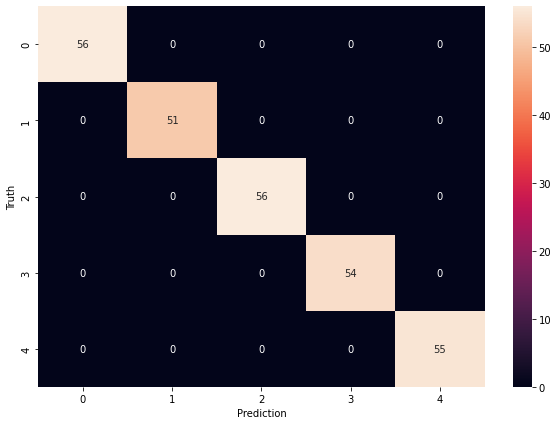

In [41]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [42]:
fruit_dict.keys()

dict_keys(['apple', 'capsicum', 'lemon', 'orange', 'potato'])

In [43]:
def test_model(img0): #img = file_name(str)
    img1 = cv2.imread(img0)
    img1 = cv2.resize(img1, (32, 32))
    img1 = img1/255.0
    l = []
    l.append(img1)
    l = np.asarray(l)
    prediction = np.argmax(cnn.predict(l))
    result = ''
    if prediction == 0:
        result = 'prediction: apple'
    elif prediction == 1:
        result = 'prediction: capsicum'
    elif prediction == 2:
        result = 'prediction: lemon'
    elif prediction == 3:
        result = 'prediction: orange'
    else:
        result = 'prediction: potato'
    print(cnn.predict(l))
    img_show = cv2.imread(img0)
    plt.imshow(img_show)
    return result

[[9.9770606e-01 2.7541382e-05 4.8586497e-08 2.2661793e-03 1.9234152e-07]]


'prediction: apple'

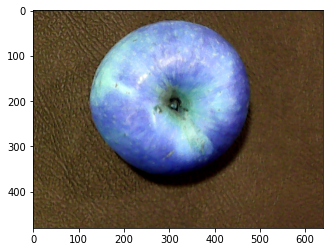

In [44]:
test_model('apple_test1.png')

[[1.0895564e-03 8.1275033e-08 3.4962380e-07 9.9890685e-01 3.1714621e-06]]


'prediction: orange'

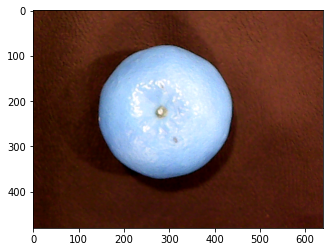

In [45]:
test_model('orange_test1.png')

[[2.0195996e-04 9.9972123e-01 4.1797659e-08 1.6039887e-06 7.5199030e-05]]


'prediction: capsicum'

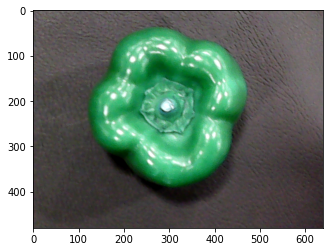

In [46]:
test_model('capsicum_test1.png')

[[1.3524440e-05 9.1014051e-08 9.4955319e-01 3.4448465e-05 5.0398756e-02]]


'prediction: lemon'

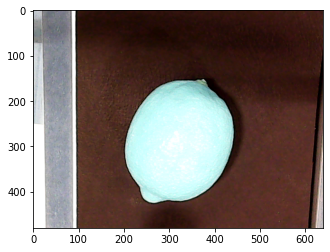

In [47]:
test_model('lemon_test1.png')

[[4.5679732e-07 1.5691600e-07 3.4101002e-03 3.6753611e-06 9.9658561e-01]]


'prediction: potato'

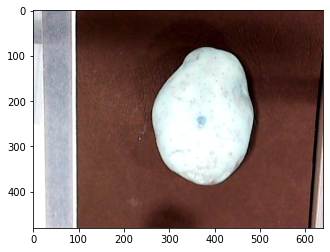

In [48]:
test_model('potato_test1.png')

[[1.7408340e-05 2.7825656e-06 1.4927903e-02 4.2971180e-04 9.8462218e-01]]


'prediction: potato'

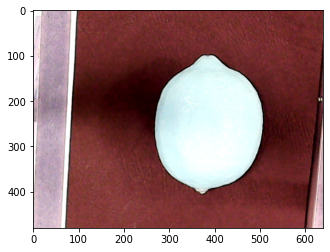

In [49]:
test_model('lemon_test2.png')

[[4.8072419e-01 6.0089692e-02 5.8192894e-04 6.0564762e-05 4.5854360e-01]]


'prediction: apple'

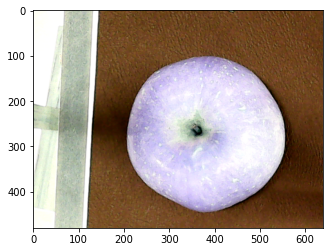

In [51]:
test_model('apple_test2.png')

In [57]:
file_name = 'real_model.h5'
cnn.save(file_name)

In [58]:
from tensorflow.keras.models import load_model
loaded_model = load_model(file_name)

In [59]:
print(loaded_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                147520    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 3

In [56]:
class_dict

{'apple': 0, 'capsicum': 1, 'lemon': 2, 'orange': 3, 'potato': 4}